In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("a1_FlightFare_Dataset.xlsx")

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (10001, 11)


In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
print("\nData Types:")
print(df.info())


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB
None


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
df.dropna(inplace = True)
print("shape:", df.shape)

shape: (10000, 11)


In [8]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop(['Date_of_Journey'], axis=1, inplace= True)
print(df[['Journey_Day', 'Journey_Month']].head())

   Journey_Day  Journey_Month
0           24              3
1            1              5
2            9              6
3           12              5
4            1              3


In [9]:
# Extract Dep_Hour and Dep_Minute safely
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_Minute'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))
df.drop(['Dep_Time'], axis=1, inplace=True)

# Extract Arrival_Hour and Arrival_Minute safely
# If time has extra date info, take only first part
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_Minute'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1].split()[0]))
df.drop(['Arrival_Time'], axis=1, inplace=True)


In [10]:
print(df[['Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']].head())

   Dep_Hour  Dep_Minute  Arrival_Hour  Arrival_Minute
0        22          20             1              10
1         5          50            13              15
2         9          25             4              25
3        18           5            23              30
4        16          50            21              35


In [11]:
def convert_duration(x):
    x= x.strip()
    hours =0
    minutes = 0
    if 'h' in x:
        hours = int(x.split('h')[0])
        x= x.split('h')[1]
    if 'm' in x:
        minutes = int(x.split('m')[0])
    return hours*60+minutes
df['Duration_mins'] = df['Duration'].apply(convert_duration)

# Drop original Duration column
df.drop(['Duration'], axis=1, inplace=True)

print(df[['Duration_mins']].head())

   Duration_mins
0            170
1            445
2           1140
3            325
4            285


In [12]:
# Replace non-stop and stops with numbers
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
df['Total_Stops'] = df['Total_Stops'].astype(int)

print(df['Total_Stops'].value_counts())

Total_Stops
1    5281
0    3259
2    1415
3      44
4       1
Name: count, dtype: int64


C:\Users\ASHAD\AppData\Local\Temp\ipykernel_22464\2637823292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})


In [13]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


In [15]:
# Perform One-Hot Encoding on categorical columns
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)

print("Shape after encoding:", df.shape)
print("Columns after encoding:")
print(df.columns)

Shape after encoding: (10000, 29)
Columns after encoding:
Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [16]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,False,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,445,True,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,1140,False,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,325,False,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,285,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")


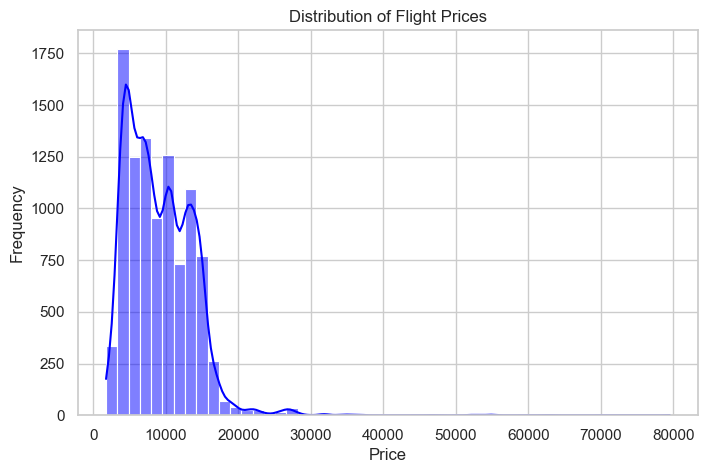

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


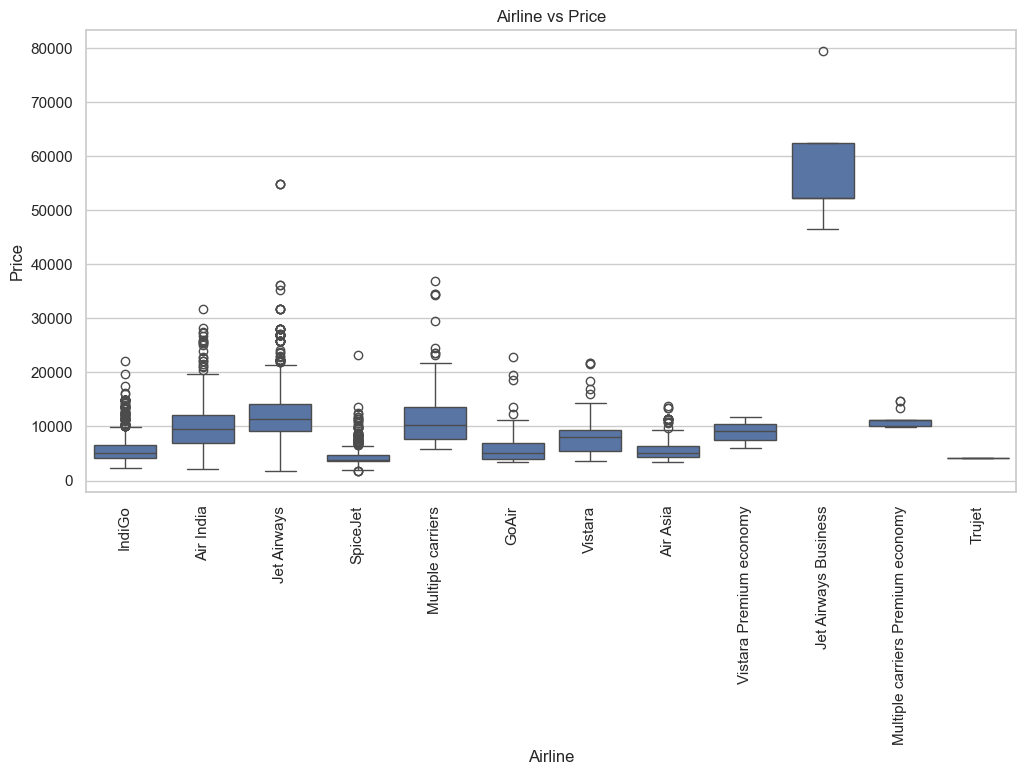

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Price', data=pd.read_excel("a1_FlightFare_Dataset.xlsx"))
plt.xticks(rotation=90)
plt.title('Airline vs Price')
plt.show()


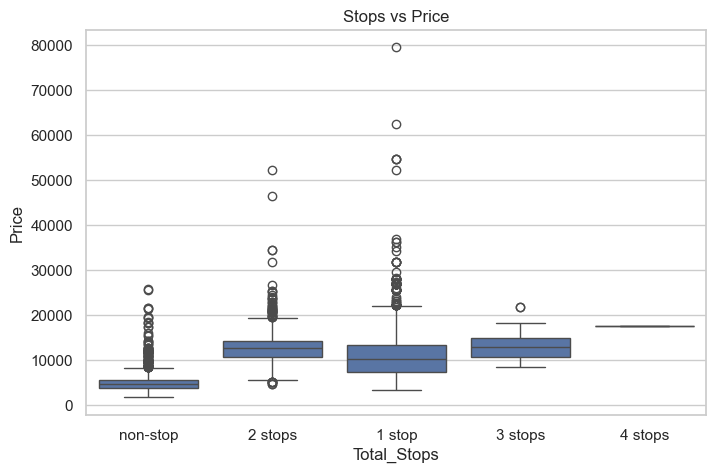

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops', y='Price', data=pd.read_excel("a1_FlightFare_Dataset.xlsx"))
plt.title('Stops vs Price')
plt.show()


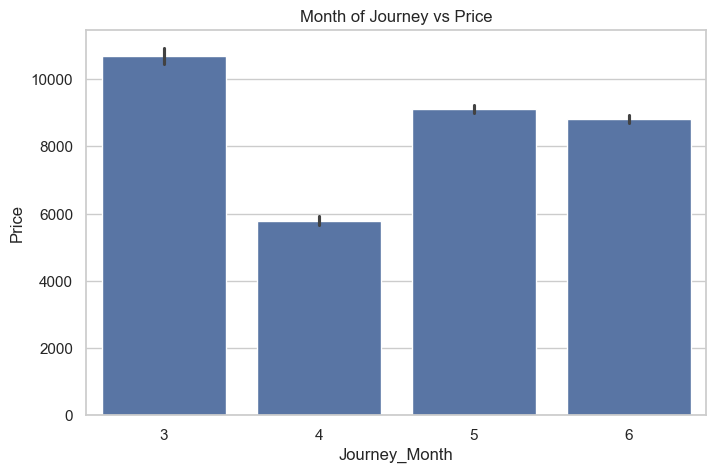

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Journey_Month', y='Price', data=df)
plt.title('Month of Journey vs Price')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis = 1)
y = df["Price"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8000, 28)
Testing set size: (2000, 28)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf_model = RandomForestRegressor( n_estimators = 200, random_state = 42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("Random Forest Performance:")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")

Random Forest Performance:
R²: 0.8496
MAE: 1113.63
RMSE: 1728.58


In [24]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state = 42)
xgb_model.fit(X_train,y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print("\nXGBoost Performance:")
print(f"R²: {xgb_r2:.4f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")


XGBoost Performance:
R²: 0.8696
MAE: 1121.44
RMSE: 1609.55


In [25]:
print("\nModel Comparison:")
print(f"Random Forest -> R²: {rf_r2:.4f}, RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")
print(f"XGBoost       -> R²: {xgb_r2:.4f}, RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")


Model Comparison:
Random Forest -> R²: 0.8496, RMSE: 1728.58, MAE: 1113.63
XGBoost       -> R²: 0.8696, RMSE: 1609.55, MAE: 1121.44


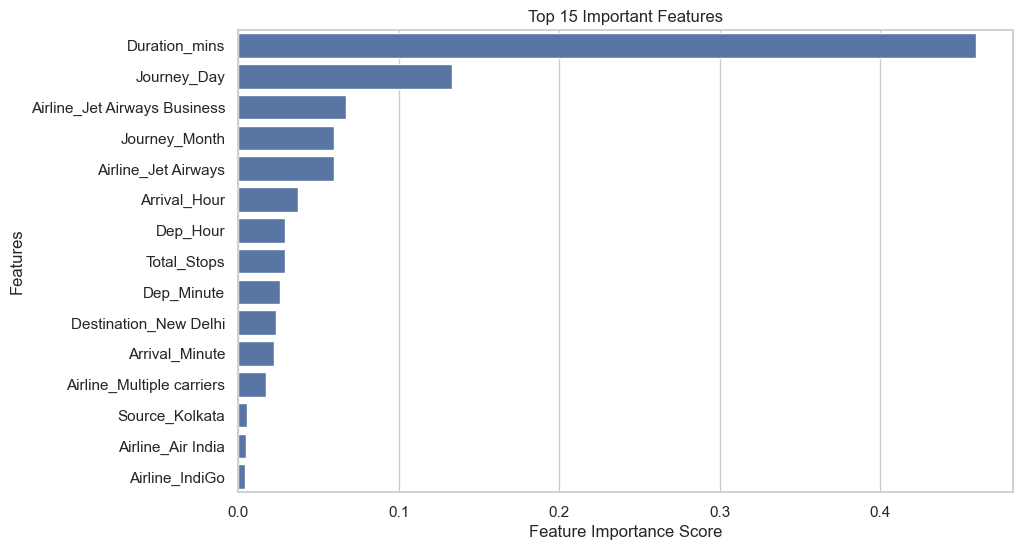

In [26]:
# Feature importance from Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 15 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [27]:
import joblib

joblib.dump(rf_model, "flight_price_model.pkl")


joblib.dump(X.columns, "model_features.pkl")

['model_features.pkl']